In [1]:
# Семинар 12: спецификация модели, тест Рамсея

import numpy as np
import pandas as pd # чтение файлов
import matplotlib.pyplot as plt # построение графиков
import seaborn as sns # построение графиков
import statsmodels.api as sm # тесты
import statsmodels
import statsmodels.stats.diagnostic as sm_diagnostic # тест Бройша-Пагана
import pandas as pd
from sklearn import datasets
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as oi

import statsmodels.formula.api as smf

In [2]:
get_ipython().system('pip install rdatasets') # наборы данных
# !pip install pyreadstat # чтение spss/stata данных
from rdatasets import data 
# from pyreadstat import read_sav, set_value_labels

In [3]:
flats = pd.read_excel('/Users/polinapogorelova/Desktop/Метрика_ИП/Данные/dataflats.xlsx')

In [4]:
import math
flats['price_sq'] = flats['price']/flats['totsp']
flats

,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,price_sq
0,81,58,40,6.0,12.5,7,1,1,1,1.396552
1,75,44,28,6.0,13.5,7,1,0,1,1.704545
2,128,70,42,6.0,14.5,3,1,1,1,1.828571
3,95,61,37,6.0,13.5,7,1,0,1,1.557377
4,330,104,60,11.0,10.5,7,0,1,1,3.173077
...,...,...,...,...,...,...,...,...,...,...
2035,110,77,45,10.0,12.0,5,0,0,1,1.428571
2036,95,60,43,6.0,9.0,5,0,0,1,1.583333
2037,95,60,46,5.0,10.5,5,1,0,1,1.583333
2038,129,76,48,10.0,12.5,5,0,0,1,1.697368


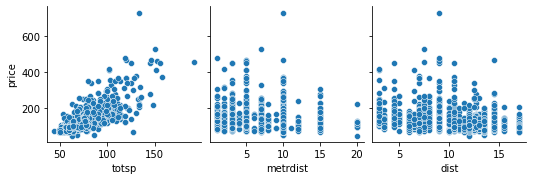

In [5]:
# Построим графики зависимостей стоимости квартиры от факторов
sns.pairplot(flats, x_vars=["totsp", "metrdist", "dist"], y_vars=["price"])

In [10]:
import math
flats['log_price'] = np.log(flats['price'])
flats['log_totsp'] = np.log(flats['totsp'])
flats['log_dist'] = np.log(flats['dist'])
flats['log_metrdist'] = np.log(flats['metrdist'])
flats['log_totsp_brick'] = flats['log_totsp']*flats['brick']
flats

,price,totsp,livesp,kitsp,dist,metrdist,walk,brick,floor,price_sq,log_price,log_totsp,log_dist,log_metrdist,log_totsp_brick
0,81,58,40,6.0,12.5,7,1,1,1,1.396552,4.394449,4.060443,2.525729,1.945910,4.060443
1,75,44,28,6.0,13.5,7,1,0,1,1.704545,4.317488,3.784190,2.602690,1.945910,0.000000
2,128,70,42,6.0,14.5,3,1,1,1,1.828571,4.852030,4.248495,2.674149,1.098612,4.248495
3,95,61,37,6.0,13.5,7,1,0,1,1.557377,4.553877,4.110874,2.602690,1.945910,0.000000
4,330,104,60,11.0,10.5,7,0,1,1,3.173077,5.799093,4.644391,2.351375,1.945910,4.644391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,110,77,45,10.0,12.0,5,0,0,1,1.428571,4.700480,4.343805,2.484907,1.609438,0.000000
2036,95,60,43,6.0,9.0,5,0,0,1,1.583333,4.553877,4.094345,2.197225,1.609438,0.000000
2037,95,60,46,5.0,10.5,5,1,0,1,1.583333,4.553877,4.094345,2.351375,1.609438,0.000000
2038,129,76,48,10.0,12.5,5,0,0,1,1.697368,4.859812,4.330733,2.525729,1.609438,0.000000


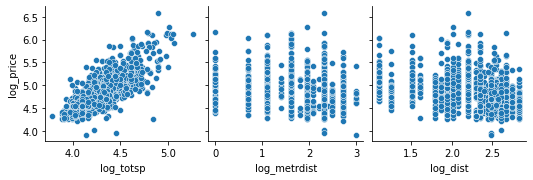

In [11]:
# Построим графики зависимостей логарифма стоимости квартиры от логарифмированных факторов
sns.pairplot(flats, x_vars=[ "log_totsp", "log_metrdist", "log_dist"], y_vars=["log_price"])

In [20]:
# оценим три модели
model_1 = smf.ols("log_price ~ log_totsp + brick", flats).fit()
print(model_1.summary())
model_2 = smf.ols("log_price ~ log_totsp + brick + log_dist", flats).fit()
print(model_2.summary())
model_3 = smf.ols("log_price ~ log_totsp + brick + log_dist + log_totsp_brick", flats).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     1798.
Date:                Mon, 05 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:05:56   Log-Likelihood:                 498.08
No. Observations:                2040   AIC:                            -990.2
Df Residuals:                    2037   BIC:                            -973.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6164      0.095     -6.473      0.0

In [21]:
# Проведем тест Рамсея для каждой из трех моделей
# H0: спецификация верная (нет пропущенных переменных)
# H1: спецификация неверная (есть пропущенные переменные)
print(oi.reset_ramsey (model_1, degree = 3)) # на уровне значимости 5% гипотеза H0 отвергается
print(oi.reset_ramsey (model_2, degree = 3)) # на уровне значимости 5% гипотеза H0 отвергается
print(oi.reset_ramsey (model_3, degree = 3)) # на уровне значимости 5% гипотеза H0 отвергается

<F test: F=array([[4.79940743]]), p=0.008328067645400315, df_denom=2.04e+03, df_num=2>
<F test: F=array([[13.23721409]]), p=1.94197126701552e-06, df_denom=2.03e+03, df_num=2>
<F test: F=array([[11.09409547]]), p=1.6143519925171958e-05, df_denom=2.03e+03, df_num=2>


In [22]:
# Добавим дополнительные объясняющие переменные

flats['log_metrdist_w'] = flats['log_metrdist']*flats['walk']
flats['no_walk'] = 1 - flats['walk']
flats['log_metrdist_nw'] = flats['log_metrdist']*flats['no_walk']

# Как бы Вы проинтерпретировали данные переменные?

In [24]:
# Включим вышеперечисленные переменные в модель и переоценим ее
reg = smf.ols("log_price ~ log_totsp + brick + log_dist + log_metrdist_w + log_metrdist_nw", flats).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     1022.
Date:                Mon, 05 Dec 2022   Prob (F-statistic):               0.00
Time:                        12:16:03   Log-Likelihood:                 742.17
No. Observations:                2040   AIC:                            -1472.
Df Residuals:                    2034   BIC:                            -1439.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0638      0.091     

In [28]:
# Проведем тест Рамсея для данной модели
# H0: спецификация верная (нет пропущенных переменных)
# H1: спецификация неверная (есть пропущенные переменные)
print(oi.reset_ramsey (reg, degree = 3)) # на уровне значимости 5% гипотеза H0 отвергается

<F test: F=array([[11.07926318]]), p=1.6382607852093204e-05, df_denom=2.03e+03, df_num=2>
